REA Differential Equations Notebook

* Page 1A

Tutor:
* Anthropic's AI, Claude

I'll help you create a comprehensive overview of the Logistic Population Growth model following your requested format.

## Logistic Population Growth Model
Let's consider a population P(t) with:
- Growth rate (k) = intrinsic growth rate
- Carrying capacity (K) = maximum sustainable population
- Initial population P₀

### Step 1: Setup the Differential Equation
- The logistic growth equation:
 - $\frac{dP}{dt} = kP(1-\frac{P}{K})$
 - This combines two effects:
   - Growth term (kP)
   - Limiting term (1-P/K)

### Step 2: Understanding the Components
1. When P << K:
 - (1-P/K) ≈ 1
 - Growth is approximately exponential
 - $\frac{dP}{dt} ≈ kP$
2. When P approaches K:
 - (1-P/K) approaches 0
 - Growth rate slows dramatically
3. When P = K:
 - $\frac{dP}{dt} = 0$
 - Population stabilizes

### Step 3: General Solution
- The solution to the differential equation is:
 - $P(t) = \frac{K}{1 + (\frac{K-P_0}{P_0})e^{-kt}}$
 where P₀ is the initial population

### Step 4: Key Features
1. **Carrying Capacity** (K):
 - Upper limit of population growth
 - Horizontal asymptote
2. **Growth Rate** (k):
 - Determines speed of approach to K
 - Affects steepness of curve
3. **Inflection Point**:
 - Occurs at P = K/2
 - Maximum growth rate point

### Analysis:
1. **Growth Phases**:
 - Initial exponential growth
 - Linear growth near inflection point
 - Asymptotic approach to K
2. **Stability Points**:
 - P = 0 (unstable equilibrium)
 - P = K (stable equilibrium)

### Applications:
1. **Biological Systems**:
 - Bacterial growth in limited medium
 - Animal populations in ecosystems
 - Plant growth in confined spaces
2. **Non-biological Applications**:
 - Technology adoption
 - Market penetration
 - Disease spread

### Limitations:
1. **Model Assumptions**:
 - Continuous growth
 - Smooth approach to carrying capacity
 - No time delays
 - Constant environment
2. **Real-world Considerations**:
 - Environmental fluctuations
 - Population structure
 - Resource variability
3. **This model demonstrates key population dynamics**:
- Self-limiting growth
- Resource-dependent behavior
- Equilibrium states
- Transition from exponential to limited growth


Population Growth Summary:
--------------------------------------------------------------------------------
 Time  Population  Growth_Rate  Percent_Capacity
 0.00        1.00         0.50              1.00
 4.98       10.84         4.83             10.84
 9.95       59.38        12.06             59.38
14.92       94.62         2.54             94.62
19.90       99.53         0.23             99.53


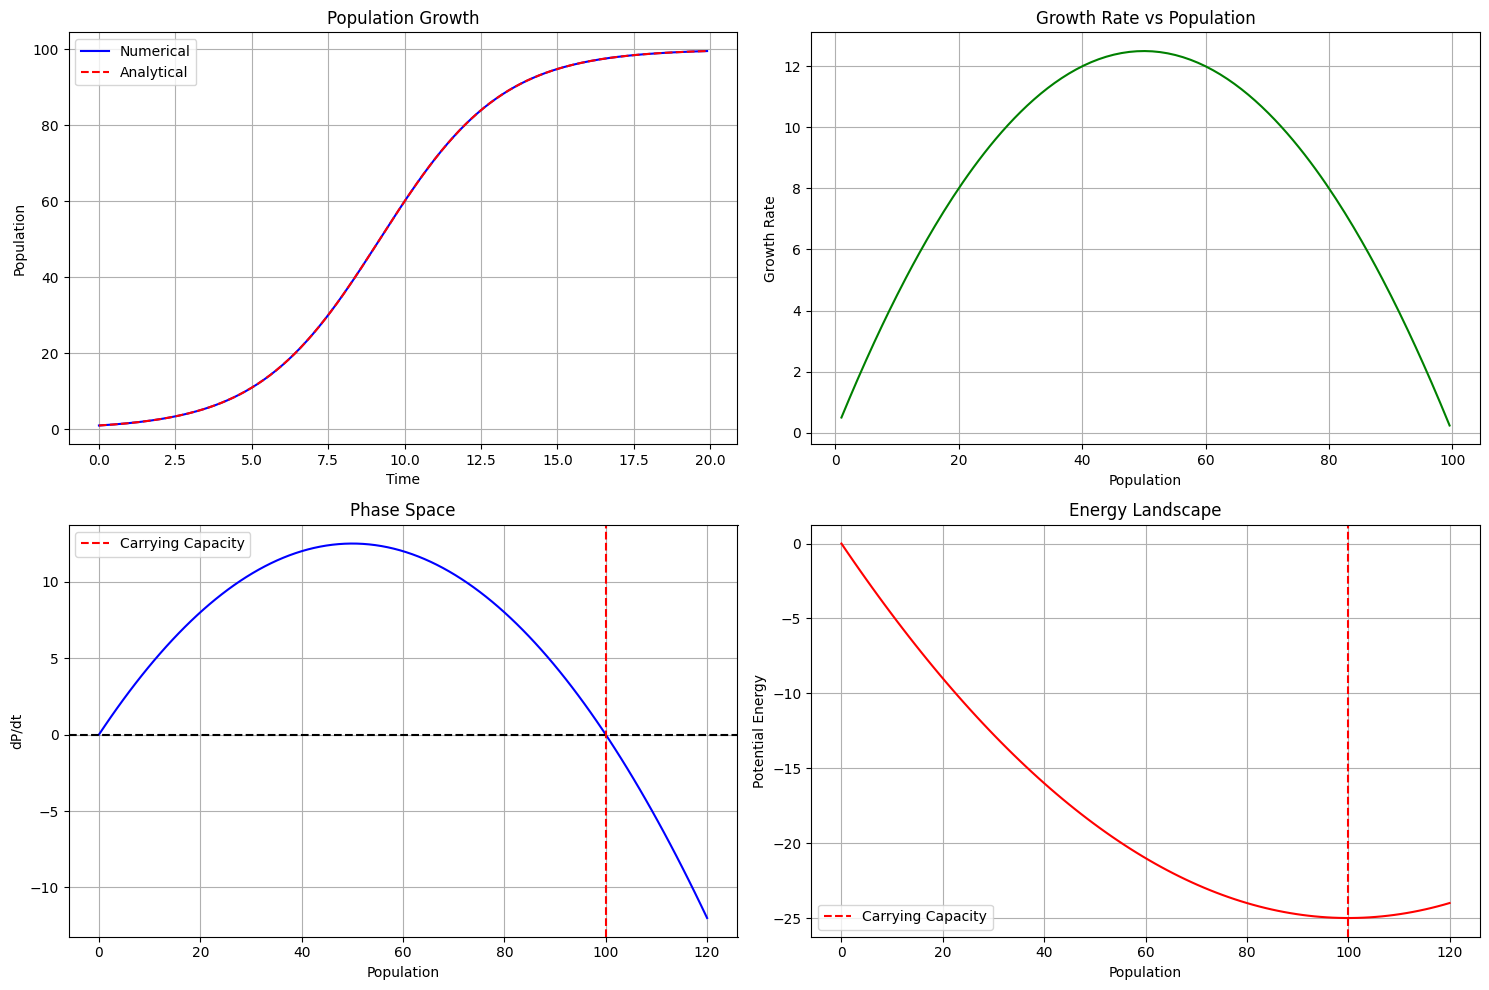

In [1]:
"""
Abstract:
---------
This script implements and analyzes the logistic population growth model, which describes
how a population grows within the constraints of limited resources. The model is given by
the differential equation: dP/dt = kP(1-P/K), where:
- P is the population size
- t is time
- k is the intrinsic growth rate
- K is the carrying capacity

The script provides:
1. Numerical solution using scipy.integrate
2. Analytical solution for comparison
3. Growth rate analysis
4. Phase space analysis
5. Visualization of results using matplotlib
6. Tabular output of key metrics
7. Energy landscape analysis showing system stability

Author: Claude
Date: November 2024
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from typing import Tuple, Callable
import seaborn as sns
from matplotlib.gridspec import GridSpec

class LogisticGrowthModel:
    def __init__(self, k: float, K: float, P0: float):
        """
        Initialize the logistic growth model.

        Parameters:
        -----------
        k : float
            Intrinsic growth rate
        K : float
            Carrying capacity
        P0 : float
            Initial population
        """
        self.k = k
        self.K = K
        self.P0 = P0

    def growth_rate(self, P: float, t: float) -> float:
        """
        Calculate the population growth rate at a given population size.

        Parameters:
        -----------
        P : float
            Current population size
        t : float
            Current time (unused but required for scipy.integrate)

        Returns:
        --------
        float
            Growth rate dP/dt
        """
        return self.k * P * (1 - P/self.K)

    def analytical_solution(self, t: float) -> float:
        """
        Compute the analytical solution of the logistic equation.

        Parameters:
        -----------
        t : float
            Time point

        Returns:
        --------
        float
            Population size at time t
        """
        return self.K / (1 + ((self.K - self.P0)/self.P0) * np.exp(-self.k * t))

    def potential_energy(self, P: float) -> float:
        """
        Calculate the potential energy landscape.
        This helps visualize stability points of the system.

        Parameters:
        -----------
        P : float
            Population size

        Returns:
        --------
        float
            Potential energy at population P
        """
        # Integrate -dP/dt to get potential energy
        return -self.k * (P * (1 - P/(2*self.K)))

    def analyze_and_visualize(self, t_span: Tuple[float, float], dt: float):
        """
        Perform comprehensive analysis and visualization of the model.

        Parameters:
        -----------
        t_span : tuple
            Time span for analysis (t_start, t_end)
        dt : float
            Time step for numerical integration
        """
        # Generate time points
        t = np.arange(t_span[0], t_span[1], dt)

        # Numerical solution
        P_numerical = odeint(self.growth_rate, self.P0, t)

        # Analytical solution
        P_analytical = np.array([self.analytical_solution(ti) for ti in t])

        # Calculate growth rates
        growth_rates = np.array([self.growth_rate(p, 0) for p in P_numerical])

        # Create figure with subplots
        fig = plt.figure(figsize=(15, 10))
        gs = GridSpec(2, 2)

        # 1. Population over time
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(t, P_numerical, 'b-', label='Numerical')
        ax1.plot(t, P_analytical, 'r--', label='Analytical')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Population')
        ax1.set_title('Population Growth')
        ax1.legend()
        ax1.grid(True)

        # 2. Growth rate vs. Population
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(P_numerical, growth_rates, 'g-')
        ax2.set_xlabel('Population')
        ax2.set_ylabel('Growth Rate')
        ax2.set_title('Growth Rate vs Population')
        ax2.grid(True)

        # 3. Phase space
        ax3 = fig.add_subplot(gs[1, 0])
        P_range = np.linspace(0, self.K*1.2, 100)
        growth_rates_range = [self.growth_rate(p, 0) for p in P_range]
        ax3.plot(P_range, growth_rates_range, 'b-')
        ax3.axhline(y=0, color='k', linestyle='--')
        ax3.axvline(x=self.K, color='r', linestyle='--', label='Carrying Capacity')
        ax3.set_xlabel('Population')
        ax3.set_ylabel('dP/dt')
        ax3.set_title('Phase Space')
        ax3.legend()
        ax3.grid(True)

        # 4. Potential energy landscape
        ax4 = fig.add_subplot(gs[1, 1])
        potential = [self.potential_energy(p) for p in P_range]
        ax4.plot(P_range, potential, 'r-')
        ax4.axvline(x=self.K, color='r', linestyle='--', label='Carrying Capacity')
        ax4.set_xlabel('Population')
        ax4.set_ylabel('Potential Energy')
        ax4.set_title('Energy Landscape')
        ax4.legend()
        ax4.grid(True)

        plt.tight_layout()

        # Create summary dataframe
        times = [0, t[-1]/4, t[-1]/2, 3*t[-1]/4, t[-1]]
        summary_data = {
            'Time': times,
            'Population': [self.analytical_solution(ti) for ti in times],
            'Growth_Rate': [self.growth_rate(self.analytical_solution(ti), 0) for ti in times],
            'Percent_Capacity': [self.analytical_solution(ti)/self.K * 100 for ti in times]
        }

        summary_df = pd.DataFrame(summary_data)
        summary_df = summary_df.round(2)

        return fig, summary_df

# Example usage and demonstration
if __name__ == "__main__":
    # Model parameters
    k = 0.5  # Growth rate
    K = 100  # Carrying capacity
    P0 = 1   # Initial population

    # Create model instance
    model = LogisticGrowthModel(k, K, P0)

    # Analyze and visualize
    fig, summary_df = model.analyze_and_visualize((0, 20), 0.1)

    # Display summary table
    print("\nPopulation Growth Summary:")
    print("-" * 80)
    print(summary_df.to_string(index=False))

    # Show plots
    plt.show()

Key insights from this output:

1. **Population Growth Summary Table**:
- Initial conditions (t=0): Population starts at 1.00 (1% of carrying capacity)
- Mid-point (t≈10): Population reaches 59.38, showing rapid growth phase
- Final state (t≈20): Population approaches carrying capacity at 99.53
- Growth rate peaks around t=10 at 12.06, then decreases significantly to 0.23 by the end

2. **Visualization Analysis**:
   - **Population Growth** (top left):
     * Perfect overlap between numerical and analytical solutions
     * Classic S-shaped (sigmoidal) curve
     * Inflection point around t=10
     * Asymptotic approach to K=100

   - **Growth Rate vs Population** (top right):
     * Parabolic shape
     * Peak at P=50 (half carrying capacity)
     * Symmetric decline on either side
     * Maximum growth rate ≈12.5

   - **Phase Space** (bottom left):
     * Shows dP/dt vs P
     * Crossing of x-axis at P=0 and P=100 (equilibrium points)
     * Positive values indicate population increase
     * Negative values show population decrease

   - **Energy Landscape** (bottom right):
     * Shows system stability
     * Minimum at carrying capacity (K=100)
     * Unstable equilibrium at P=0
     * Stable equilibrium at P=K

